## C14.eg1.USA.gov Data from Bitly

In [3]:
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
# 导入第三方类

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
np.random.seed(42)
# 通用参数设置

path = 'datasets/bitly_usagov/example.txt'
open(path).readline()
# 读入文件，并显示一行检查

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
records[0]
# 检查下records列表中的第一个元素

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [5]:
records[0]['tz']

'America/New_York'

### Counting Time Zones in Pure Python

In [6]:
# time_zones = [rec['tz'] for rec in records]
# 以上语句会报错 keyerror，因为‘tz’有空值
# 加上判断就可以了
# 此处语法为列表推导式
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
def get_counts(sequence):
# 定义数个数的函数
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
from collections import defaultdict
# 同上，使用defaultdict解决
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [9]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [10]:
len(counts)
# 总时区数
# 好奇怪，因为时区是按照国家：城市标记的

97

In [11]:
len(time_zones)
# 总数据量

3440

In [12]:
def top_counts(count_dict, n=10):
# 定义显示前10函数
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)
# 对于list可以直接使用counter

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [15]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()
frame['tz'][:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [16]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [17]:
clean_tz = frame['tz'].fillna('Missing')
# 数据中的NaN为缺失值
clean_tz[clean_tz == ''] = 'Unknown'
# 数据中的''为空值
# 仔细观察，数据中两个都是存在的
# 具体区别是 NaN 可以用于数学运算，而空值不可以，具体：
# https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none
# dataframe中的isnull和isna完全一样的
# https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

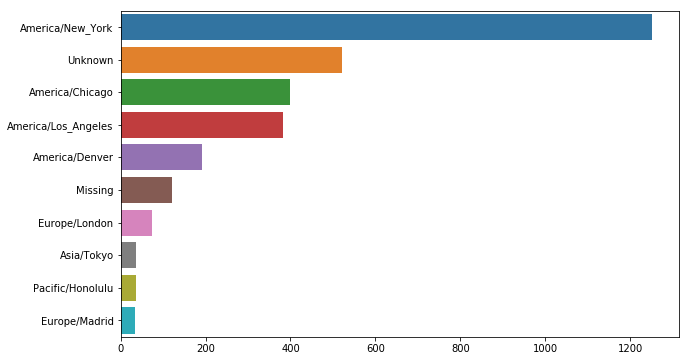

In [18]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values);

In [19]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [20]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
# split默认分隔符是空格
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [21]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [22]:
cframe = frame[frame.a.notnull()].copy()
# 使用copy复制出新的cframe

In [23]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [24]:
by_tz_os = cframe.groupby(['tz', 'os'])
by_tz_os.size().head()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
dtype: int64

In [25]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]
# stack 和 ustack 在导学 pandas 最后有说明

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [26]:
agg_counts.sum(axis=1)

tz
                                  521.0
Africa/Cairo                        3.0
Africa/Casablanca                   1.0
Africa/Ceuta                        2.0
Africa/Johannesburg                 1.0
Africa/Lusaka                       1.0
America/Anchorage                   5.0
America/Argentina/Buenos_Aires      1.0
America/Argentina/Cordoba           1.0
America/Argentina/Mendoza           1.0
                                  ...  
Europe/Sofia                        1.0
Europe/Stockholm                   14.0
Europe/Uzhgorod                     1.0
Europe/Vienna                       6.0
Europe/Vilnius                      2.0
Europe/Volgograd                    1.0
Europe/Warsaw                      16.0
Europe/Zurich                       4.0
Pacific/Auckland                   11.0
Pacific/Honolulu                   36.0
Length: 97, dtype: float64

In [27]:
# Use to sort in ascending order
indexer = agg_counts.sum(axis=1).argsort()
# sum(1) 是 sum(axis=1) 的缩写
## argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y。
## 例如：x[3]=-1最小，所以y[0]=3,x[5]=9最大，所以y[5]=5。
# np.argsort()[num]
## 当num>=0时，np.argsort()[num]就可以理解为y[num];
## 当num<0时，np.argsort()[num]就是把数组y的元素反向输出。
## 例如np.argsort()[-1]即输出x中最大值对应的index，np.argsort()[-2]即输出x中第二大值对应的index。
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

**关于take的说明：**根据提供的索引值将元素形成数组输出
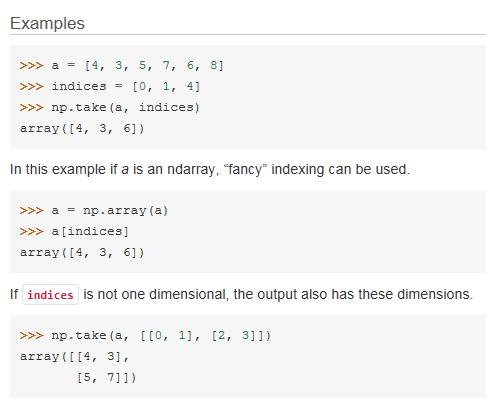

In [28]:
count_subset = agg_counts.take(indexer[-10:])
# [-10:] 是说最大的10个
count_subset

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [29]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

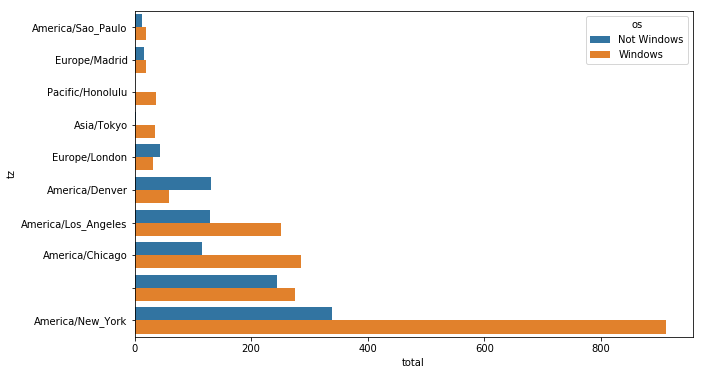

In [30]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [31]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

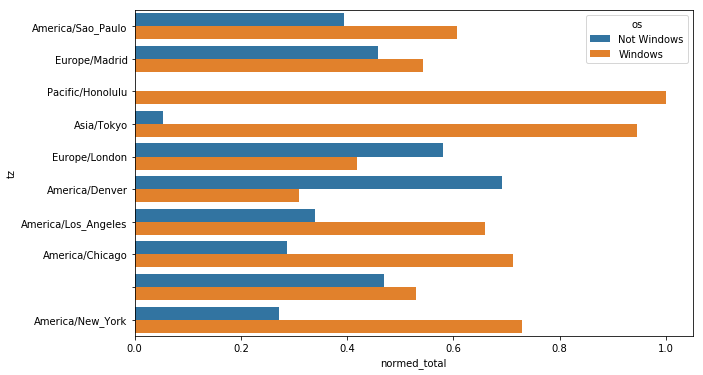

In [32]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results);

In [33]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64